In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

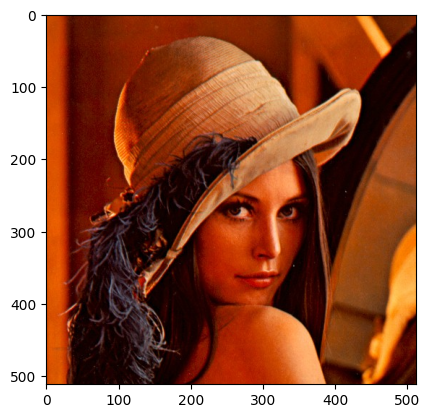

In [ ]:
image=cv2.imread('/content/Fig0646(a)(lenna_original_RGB).tif',cv2.IMREAD_COLOR_RGB)
plt.imshow(image)
plt.show()


In [ ]:

scaled_image = image
chanel1 = image[:,:,0]/255
chanel2 = image[:,:,1]/255
chanel3 = image[:,:,2]/255
intensity_channel = (chanel1 + chanel2 + chanel3)/3
min_val = np.minimum(np.minimum(chanel1,chanel2),chanel3)
saturation_channel = 1 -(3/(chanel1+chanel2+chanel3)) * min_val
numerat = 0.5 * ((chanel1-chanel2) +(chanel1-chanel3))
denumerat = np.sqrt((chanel1-chanel2)**2 +(chanel1-chanel3)*(chanel2-chanel3))
aa = numerat/(denumerat +1e-6)
teetaa =np.arccos(aa)
hue = np.zeros_like(teetaa)

for i in range(teetaa.shape[0]):
    for j in range(teetaa.shape[1]):
        if chanel3[i,j]<=chanel2[i,j]:
            hue[i,j] = teetaa[i,j]
        elif chanel3[i,j] > chanel2[i,j]:
            hue[i,j] = 2*np.pi-teetaa[i,j]
hue  = hue/(2*np.pi)


/tmp/ipython-input-3124009509.py:7: RuntimeWarning: divide by zero encountered in divide
  saturation_channel = 1 -(3/(chanel1+chanel2+chanel3)) * min_val
/tmp/ipython-input-3124009509.py:7: RuntimeWarning: invalid value encountered in multiply
  saturation_channel = 1 -(3/(chanel1+chanel2+chanel3)) * min_val


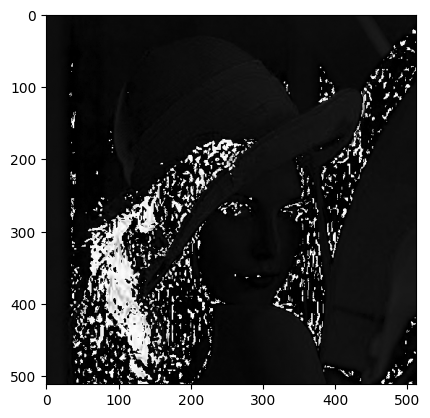

In [ ]:
plt.imshow(hue,cmap='gray')
plt.show()

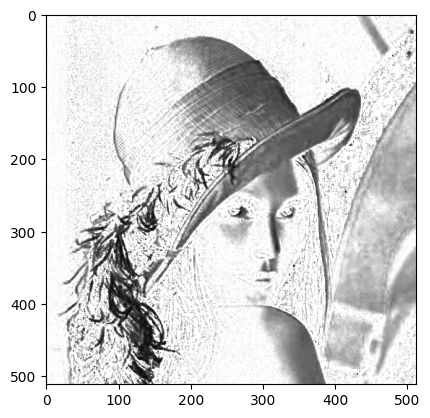

In [ ]:
plt.imshow(saturation_channel,cmap='gray')
plt.show()

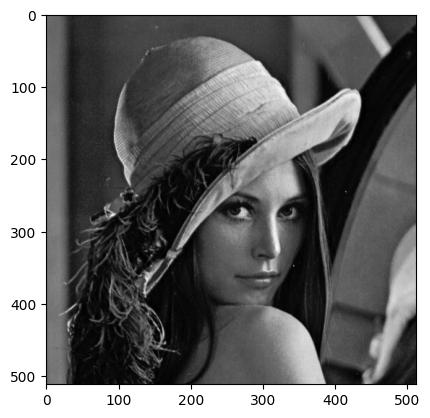

In [ ]:
plt.imshow(intensity_channel,cmap='gray')
plt.show()

In [ ]:
r,g,b=cv2.split(image)

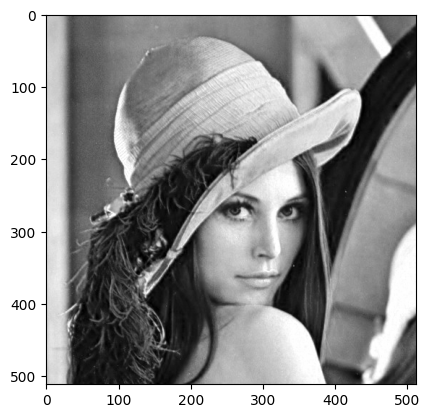

In [ ]:
plt.imshow(r,cmap='gray')
plt.show()

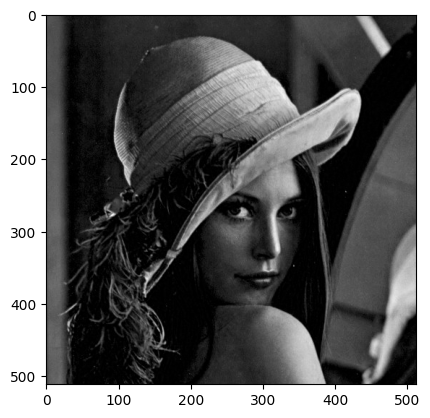

In [ ]:
plt.imshow(g,cmap='gray')
plt.show()

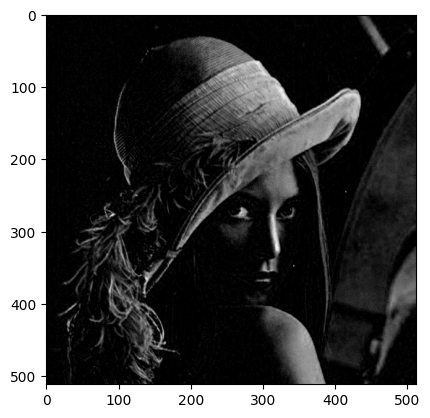

In [ ]:
plt.imshow(b,cmap='gray')
plt.show()

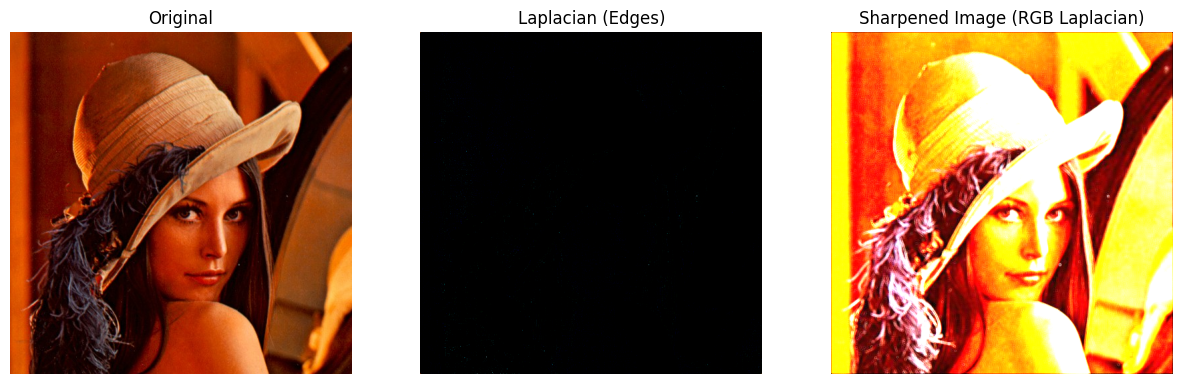

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load color image
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")   # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Laplacian kernel (3x3)
kernel = np.array([[-1, -1, -1],
                   [-1, 4, -1],
                   [-1, -1, -1]])

k = 3
pad = k // 2

# Pad image to handle borders
padded_img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='constant')

# Empty arrays
laplacian = np.zeros_like(img, dtype=np.float32)
sharpened = np.zeros_like(img, dtype=np.float32)

# Step 2: Apply Laplacian separately to R, G, B
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for c in range(3):  # loop over channels (R,G,B)
            region = padded_img[i:i+k, j:j+k, c]   # 3x3 neighborhood
            value = np.sum(region * kernel)        # convolution
            laplacian[i, j, c] = value

# Step 3: Sharpen image = Original - Laplacian
sharpened = img.astype(np.float32) - laplacian

# Clip values to [0,255]
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
laplacian = np.clip(laplacian, 0, 255).astype(np.uint8)

# Step 4: Show results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Laplacian (Edges)")
plt.imshow(laplacian)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Sharpened Image (RGB Laplacian)")
plt.imshow(sharpened)
plt.axis("off")

plt.show()


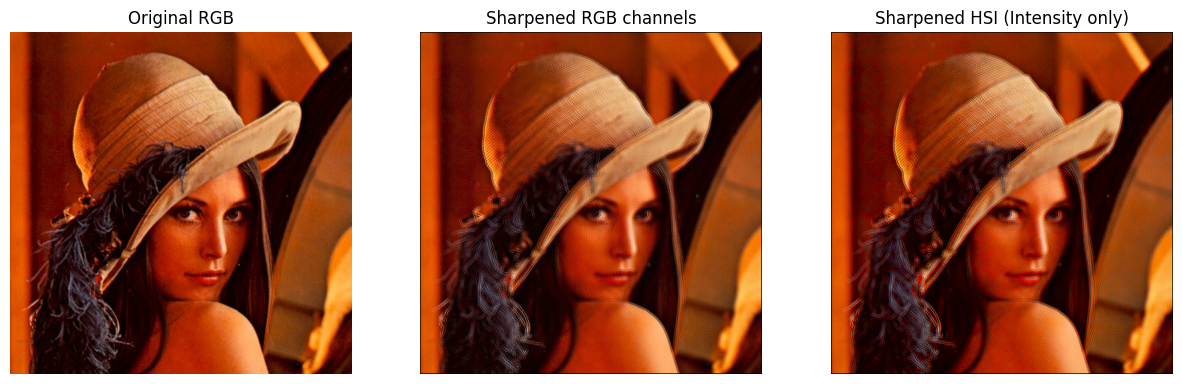

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --------------------------
# Utility: RGB -> HSI
# --------------------------
def rgb_to_hsi(img):
    img = img.astype(np.float32) / 255.0
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-8  # avoid /0
    theta = np.arccos(num / den)

    H = theta.copy()
    H[B > G] = 2*np.pi - H[B > G]
    H = H / (2*np.pi)  # normalize [0,1]

    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3/(R+G+B+1e-8)) * min_rgb
    I = (R + G + B) / 3

    return np.stack((H, S, I), axis=-1)

# --------------------------
# Utility: HSI -> RGB
# --------------------------
def hsi_to_rgb(hsi):
    H, S, I = hsi[:,:,0]*2*np.pi, hsi[:,:,1], hsi[:,:,2]
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)

    # Sector 0 to 120
    idx = (H < 2*np.pi/3)
    B[idx] = I[idx] * (1 - S[idx])
    R[idx] = I[idx] * (1 + S[idx]*np.cos(H[idx]) / np.cos(np.pi/3 - H[idx]))
    G[idx] = 3*I[idx] - (R[idx] + B[idx])

    # Sector 120 to 240
    idx = (H >= 2*np.pi/3) & (H < 4*np.pi/3)
    H2 = H[idx] - 2*np.pi/3
    R[idx] = I[idx] * (1 - S[idx])
    G[idx] = I[idx] * (1 + S[idx]*np.cos(H2) / np.cos(np.pi/3 - H2))
    B[idx] = 3*I[idx] - (R[idx] + G[idx])

    # Sector 240 to 360
    idx = (H >= 4*np.pi/3)
    H3 = H[idx] - 4*np.pi/3
    G[idx] = I[idx] * (1 - S[idx])
    B[idx] = I[idx] * (1 + S[idx]*np.cos(H3) / np.cos(np.pi/3 - H3))
    R[idx] = 3*I[idx] - (G[idx] + B[idx])

    rgb = np.stack((R,G,B), axis=-1)
    rgb = np.clip(rgb, 0, 1)
    return (rgb * 255).astype(np.uint8)

# --------------------------
# Laplacian filter manually
# --------------------------
def laplacian_filter_gray(channel):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    k = 3
    pad = k // 2
    padded = np.pad(channel, ((pad, pad), (pad, pad)), mode='constant')
    out = np.zeros_like(channel, dtype=np.float32)

    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            region = padded[i:i+k, j:j+k]
            out[i, j] = np.sum(region * kernel)
    return out

# --------------------------
# Main Code
# --------------------------
# Load image
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert RGB -> HSI
hsi = rgb_to_hsi(img)
H, S, I = hsi[:,:,0], hsi[:,:,1], hsi[:,:,2]

# Apply Laplacian only on Intensity
lap_I = laplacian_filter_gray(I)
sharp_I = I - lap_I
sharp_I = np.clip(sharp_I, 0, 1)

# Recombine H,S, sharpened I
hsi_sharp = np.stack((H, S, sharp_I), axis=-1)

# Convert back to RGB
sharp_img = hsi_to_rgb(hsi_sharp)

# Apply Laplacian to each RGB channel separately for comparison
lap_R = laplacian_filter_gray(img[:,:,0].astype(np.float32))
lap_G = laplacian_filter_gray(img[:,:,1].astype(np.float32))
lap_B = laplacian_filter_gray(img[:,:,2].astype(np.float32))
lap_rgb = np.stack((lap_R, lap_G, lap_B), axis=-1)

# Sharpen RGB by subtracting the Laplacian of each channel
sharp_rgb = img.astype(np.float32) - lap_rgb
sharp_rgb = np.clip(sharp_rgb, 0, 255).astype(np.uint8)


# --------------------------
# Show results
# --------------------------
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.title("Original RGB"); plt.imshow(img); plt.axis("off")
plt.subplot(1,3,2); plt.title("Sharpened RGB channels");
plt.imshow(sharp_rgb); plt.axis("off")
plt.subplot(1,3,3); plt.title("Sharpened HSI (Intensity only)"); plt.imshow(sharp_img); plt.axis("off")
plt.show()

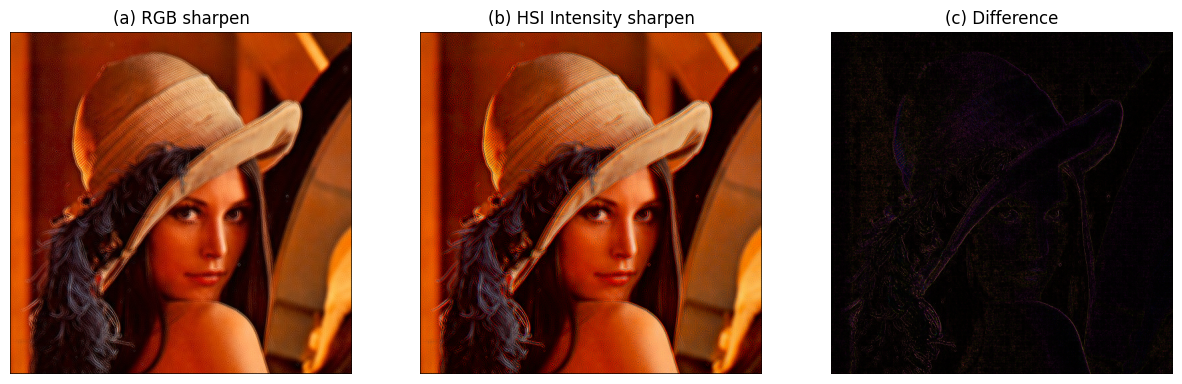

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --------------------------
# Manual Laplacian for 2D
# --------------------------
def laplacian_filter_gray(channel):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    k = 3
    pad = k // 2
    padded = np.pad(channel, ((pad, pad), (pad, pad)), mode='constant')
    out = np.zeros_like(channel, dtype=np.float32)

    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            region = padded[i:i+k, j:j+k]
            out[i, j] = np.sum(region * kernel)
    return out

# --------------------------
# RGB -> HSI
# --------------------------
def rgb_to_hsi(img):
    img = img.astype(np.float32) / 255.0
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-8
    theta = np.arccos(np.clip(num / den, -1, 1))

    H = theta.copy()
    H[B > G] = 2*np.pi - H[B > G]
    H = H / (2*np.pi)

    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3/(R+G+B+1e-8)) * min_rgb
    I = (R + G + B) / 3

    return np.stack((H, S, I), axis=-1)

# --------------------------
# HSI -> RGB
# --------------------------
def hsi_to_rgb(hsi):
    H, S, I = hsi[:,:,0]*2*np.pi, hsi[:,:,1], hsi[:,:,2]
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)

    # Sector 0 to 120
    idx = (H < 2*np.pi/3)
    B[idx] = I[idx] * (1 - S[idx])
    R[idx] = I[idx] * (1 + S[idx]*np.cos(H[idx]) / np.cos(np.pi/3 - H[idx]))
    G[idx] = 3*I[idx] - (R[idx] + B[idx])

    # Sector 120 to 240
    idx = (H >= 2*np.pi/3) & (H < 4*np.pi/3)
    H2 = H[idx] - 2*np.pi/3
    R[idx] = I[idx] * (1 - S[idx])
    G[idx] = I[idx] * (1 + S[idx]*np.cos(H2) / np.cos(np.pi/3 - H2))
    B[idx] = 3*I[idx] - (R[idx] + G[idx])

    # Sector 240 to 360
    idx = (H >= 4*np.pi/3)
    H3 = H[idx] - 4*np.pi/3
    G[idx] = I[idx] * (1 - S[idx])
    B[idx] = I[idx] * (1 + S[idx]*np.cos(H3) / np.cos(np.pi/3 - H3))
    R[idx] = 3*I[idx] - (G[idx] + B[idx])

    rgb = np.stack((R,G,B), axis=-1)
    rgb = np.clip(rgb, 0, 1)
    return (rgb * 255).astype(np.uint8)

# --------------------------
# Main
# --------------------------
# Load image
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- (a) Sharpen RGB channels independently
rgb_sharp = np.zeros_like(img, dtype=np.float32)
for c in range(3):
    lap = laplacian_filter_gray(img[:,:,c].astype(np.float32)/255.0)
    rgb_sharp[:,:,c] = (img[:,:,c]/255.0) - lap
rgb_sharp = np.clip(rgb_sharp, 0, 1)
rgb_sharp = (rgb_sharp*255).astype(np.uint8)

# --- (b) Sharpen only Intensity in HSI
hsi = rgb_to_hsi(img)
H, S, I = hsi[:,:,0], hsi[:,:,1], hsi[:,:,2]
lap_I = laplacian_filter_gray(I)
I_sharp = np.clip(I - lap_I, 0, 1)
hsi_sharp = np.stack((H, S, I_sharp), axis=-1)
hsi_sharp_rgb = hsi_to_rgb(hsi_sharp)

# --- (c) Difference between (a) and (b)
diff_img = cv2.absdiff(rgb_sharp, hsi_sharp_rgb)

# --------------------------
# Show results
# --------------------------
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.title("(a) RGB sharpen"); plt.imshow(rgb_sharp); plt.axis("off")
plt.subplot(1,3,2); plt.title("(b) HSI Intensity sharpen"); plt.imshow(hsi_sharp_rgb); plt.axis("off")
plt.subplot(1,3,3); plt.title("(c) Difference"); plt.imshow(diff_img); plt.axis("off")
plt.show()


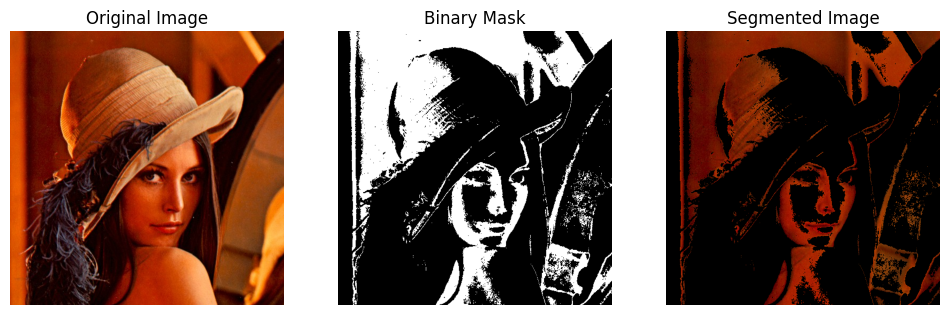

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load image
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")   # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Select ROI (manually choose a rectangle of "reddish" region)
# Example: rectangle coordinates (y1:y2, x1:x2)
y1, y2, x1, x2 = 100, 150, 100, 150  # <-- change based on your image
roi = img[y1:y2, x1:x2]

# Step 3: Compute mean vector (R, G, B) manually
R_vals = roi[:, :, 0].flatten()
G_vals = roi[:, :, 1].flatten()
B_vals = roi[:, :, 2].flatten()

mean_R = np.sum(R_vals) / len(R_vals)
mean_G = np.sum(G_vals) / len(G_vals)
mean_B = np.sum(B_vals) / len(B_vals)

# Step 4: Compute standard deviation manually
std_R = np.sqrt(np.sum((R_vals - mean_R) ** 2) / len(R_vals))
std_G = np.sqrt(np.sum((G_vals - mean_G) ** 2) / len(G_vals))
std_B = np.sqrt(np.sum((B_vals - mean_B) ** 2) / len(B_vals))

# Step 5: Define the RGB "box" boundaries
k = 1.25  # scaling factor
R_min, R_max = mean_R - k * std_R, mean_R + k * std_R
G_min, G_max = mean_G - k * std_G, mean_G + k * std_G
B_min, B_max = mean_B - k * std_B, mean_B + k * std_B

# Step 6: Create binary mask manually
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        R, G, B = img[i, j]
        if (R_min <= R <= R_max) and (G_min <= G <= G_max) and (B_min <= B <= B_max):
            mask[i, j] = 255   # inside the box → white
        else:
            mask[i, j] = 0     # outside → black

# Step 7: Apply mask to visualize segmentation
segmented = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask[i, j] == 255:
            segmented[i, j] = img[i, j]   # keep pixel
        else:
            segmented[i, j] = [0, 0, 0]   # black background

# Step 8: Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Binary Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Segmented Image")
plt.imshow(segmented)
plt.axis("off")

plt.show()


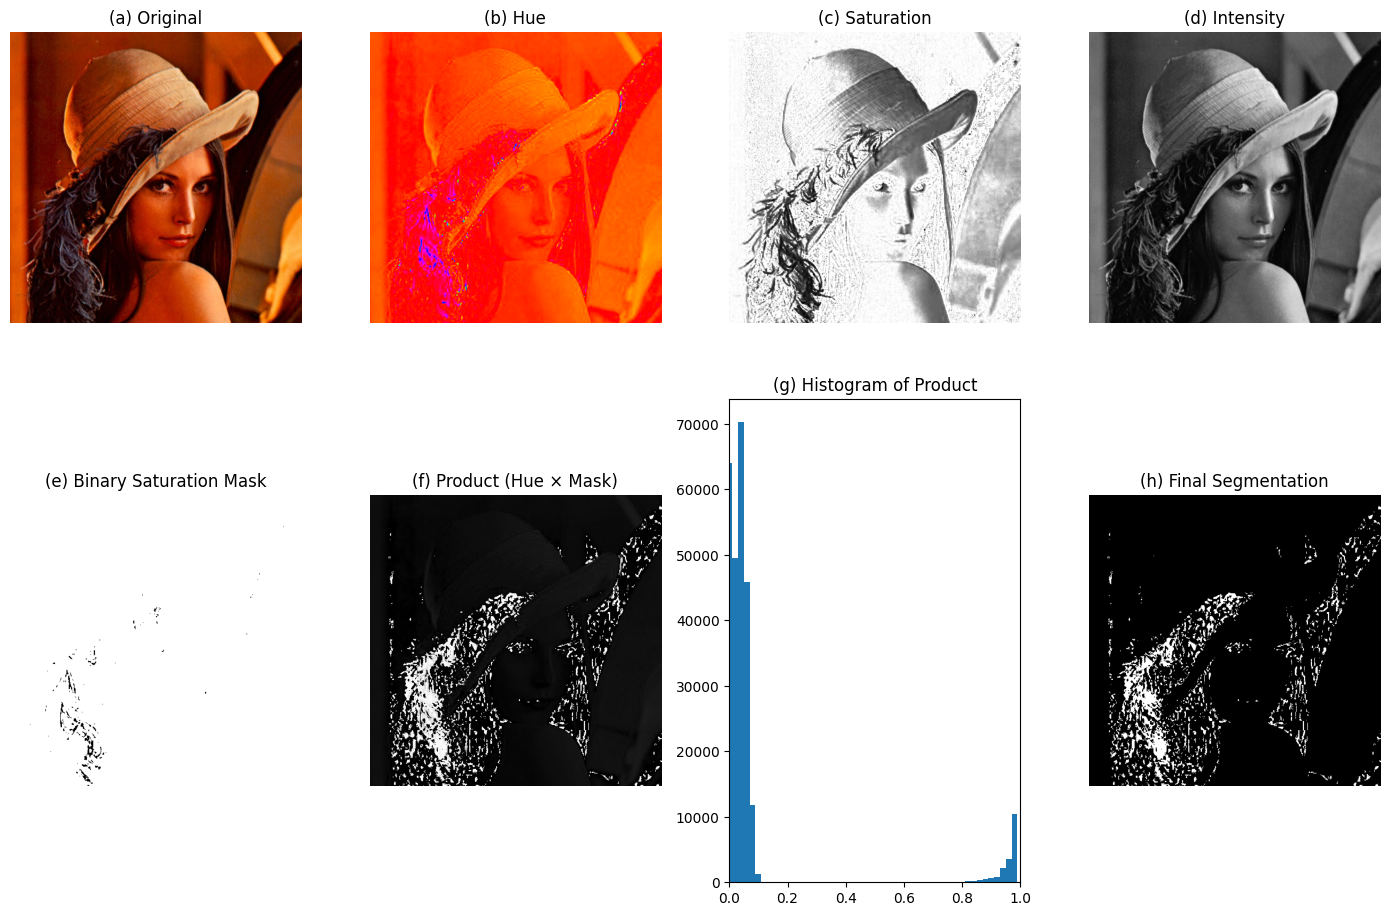

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Load image
# ---------------------------
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Normalize to [0,1]
img_norm = img / 255.0
R, G, B = img_norm[:,:,0], img_norm[:,:,1], img_norm[:,:,2]

# ---------------------------
# Step 2: Convert RGB -> HSI manually
# ---------------------------
# Intensity
I = (R + G + B) / 3.0

# Saturation
min_val = np.minimum(np.minimum(R, G), B)
S = 1 - (3 / (R + G + B + 1e-6)) * min_val  # add epsilon to avoid /0

# Hue
num = 0.5 * ((R - G) + (R - B))
den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-6
theta = np.arccos(num / den)

H = np.zeros_like(R)
H[B <= G] = theta[B <= G]
H[B > G] = (2*np.pi - theta[B > G])
H = H / (2*np.pi)  # normalize to [0,1]

# ---------------------------
# Step 3: Binary mask from Saturation
# ---------------------------
thresh_S = 0.1 * np.max(S)  # 10% of max saturation
mask = np.zeros_like(S)
mask[S > thresh_S] = 1

# ---------------------------
# Step 4: Multiply Hue × Mask
# ---------------------------
product = H * mask

# ---------------------------
# Step 5: Histogram of product
# ---------------------------
hist, bins = np.histogram(product.flatten(), bins=50, range=[0,1])

# ---------------------------
# Step 6: Final Segmentation
# ---------------------------
segmented = np.zeros_like(product)
segmented[product > 0.9] = 1  # threshold at 0.9

# ---------------------------
# Step 7: Visualization
# ---------------------------
plt.figure(figsize=(14,10))

plt.subplot(2,4,1)
plt.title("(a) Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,4,2)
plt.title("(b) Hue")
plt.imshow(H, cmap="hsv")
plt.axis("off")

plt.subplot(2,4,3)
plt.title("(c) Saturation")
plt.imshow(S, cmap="gray")
plt.axis("off")

plt.subplot(2,4,4)
plt.title("(d) Intensity")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(2,4,5)
plt.title("(e) Binary Saturation Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(2,4,6)
plt.title("(f) Product (Hue × Mask)")
plt.imshow(product, cmap="gray")
plt.axis("off")

plt.subplot(2,4,7)
plt.title("(g) Histogram of Product")
plt.bar(bins[:-1], hist, width=0.02)
plt.xlim([0,1])

plt.subplot(2,4,8)
plt.title("(h) Final Segmentation")
plt.imshow(segmented, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


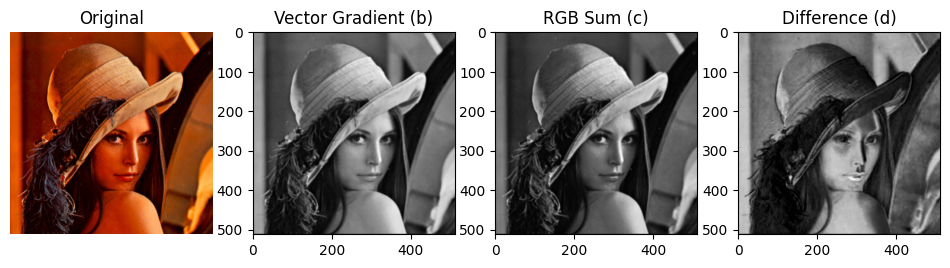

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Load color image
# --------------------------
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# --------------------------
# 2. Define Sobel kernels (manual)
# --------------------------
sobel_x = np.array([[-1, 0, -1],
                    [-2, 0, -2],
                    [-1, 0, -1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [-1, -2,  -1]])

def conv2d(image, kernel):
    """Manual 2D convolution (zero-padding)."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i,j] = np.sum(region * kernel)
    return result

# --------------------------
# 3. Compute derivatives
# --------------------------
# For each channel
Rx = conv2d(R, sobel_x)
Ry = conv2d(R, sobel_y)
Gx = conv2d(G, sobel_x)
Gy = conv2d(G, sobel_y)
Bx = conv2d(B, sobel_x)
By = conv2d(B, sobel_y)

# --------------------------
# 4. Method 1: Vector Gradient (Di Zenzo)
# --------------------------
g_xx = Rx**2 + Gx**2 + Bx**2
g_yy = Ry**2 + Gy**2 + By**2
g_xy = Rx*Ry + Gx*Gy + Bx*By

F = 0.5*(g_xx + g_yy + np.sqrt((g_xx - g_yy)**2 + 4*g_xy**2))
F = np.sqrt(F)   # Final gradient magnitude (vector method)

# --------------------------
# 5. Method 2: Channel-wise Gradients
# --------------------------
grad_R = np.sqrt(Rx**2 + Ry**2)
grad_G = np.sqrt(Gx**2 + Gy**2)
grad_B = np.sqrt(Bx**2 + By**2)

grad_sum = grad_R + grad_G + grad_B  # Composite

# --------------------------
# 6. Normalize for display
# --------------------------
F_disp = (F / np.max(F) * 255).astype(np.uint8)
grad_sum_disp = (grad_sum / np.max(grad_sum) * 255).astype(np.uint8)
diff_disp = cv2.absdiff(F_disp, grad_sum_disp)

# --------------------------
# 7. Show results
# --------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,4,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(F_disp, cmap="gray"); plt.title("Vector Gradient (b)")
plt.subplot(1,4,3); plt.imshow(grad_sum_disp, cmap="gray"); plt.title("RGB Sum (c)")
plt.subplot(1,4,4); plt.imshow(diff_disp, cmap="gray"); plt.title("Difference (d)")
plt.show()


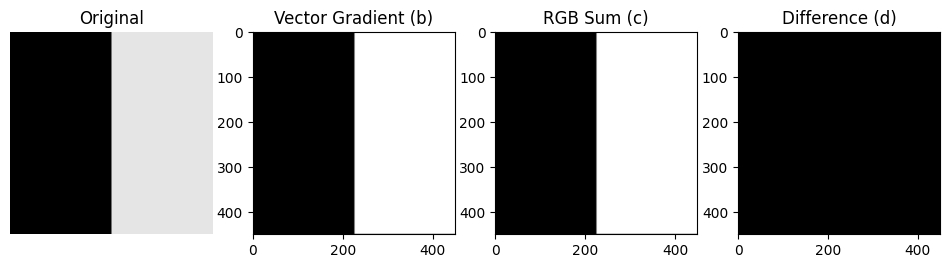

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Load color image
# --------------------------
img = cv2.imread("/content/Fig0645(f)(RGB2_green).tif")  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# --------------------------
# 2. Define Sobel kernels (manual)
# --------------------------
sobel_x = np.array([[-1, 0, -1],
                    [-2, 0, -2],
                    [-1, 0, -1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [-1, -2,  -1]])

def conv2d(image, kernel):
    """Manual 2D convolution (zero-padding)."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i,j] = np.sum(region * kernel)
    return result

# --------------------------
# 3. Compute derivatives
# --------------------------
# For each channel
Rx = conv2d(R, sobel_x)
Ry = conv2d(R, sobel_y)
Gx = conv2d(G, sobel_x)
Gy = conv2d(G, sobel_y)
Bx = conv2d(B, sobel_x)
By = conv2d(B, sobel_y)

# --------------------------
# 4. Method 1: Vector Gradient (Di Zenzo)
# --------------------------
g_xx = Rx**2 + Gx**2 + Bx**2
g_yy = Ry**2 + Gy**2 + By**2
g_xy = Rx*Ry + Gx*Gy + Bx*By

F = 0.5*(g_xx + g_yy + np.sqrt((g_xx - g_yy)**2 + 4*g_xy**2))
F = np.sqrt(F)   # Final gradient magnitude (vector method)

# --------------------------
# 5. Method 2: Channel-wise Gradients
# --------------------------
grad_R = np.sqrt(Rx**2 + Ry**2)
grad_G = np.sqrt(Gx**2 + Gy**2)
grad_B = np.sqrt(Bx**2 + By**2)

grad_sum = grad_R + grad_G + grad_B  # Composite

# --------------------------
# 6. Normalize for display
# --------------------------
F_disp = (F / np.max(F) * 255).astype(np.uint8)
grad_sum_disp = (grad_sum / np.max(grad_sum) * 255).astype(np.uint8)
diff_disp = cv2.absdiff(F_disp, grad_sum_disp)

# --------------------------
# 7. Show results
# --------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,4,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(F_disp, cmap="gray"); plt.title("Vector Gradient (b)")
plt.subplot(1,4,3); plt.imshow(grad_sum_disp, cmap="gray"); plt.title("RGB Sum (c)")
plt.subplot(1,4,4); plt.imshow(diff_disp, cmap="gray"); plt.title("Difference (d)")
plt.show()


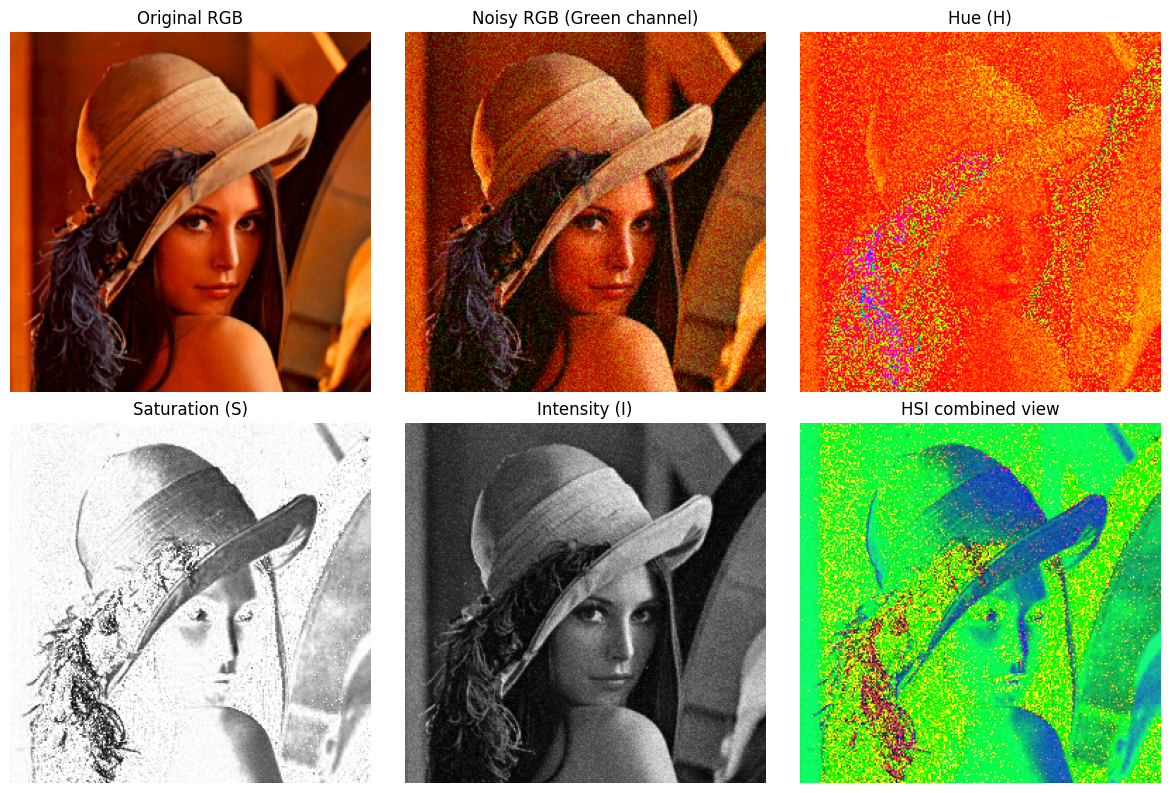

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------
# Step 1: Load Image
# -------------------
img = cv2.imread("/content/Fig0638(a)(lenna_RGB).tif")  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = cv2.resize(img, (256, 256))  # Resize for simplicity

# -------------------
# Step 2: Add Gaussian Noise to ONE Channel (Green)
# -------------------
noisy_img = img.copy().astype(np.float32)
mean, sigma = 0, 30   # Gaussian noise parameters
noise = np.random.normal(mean, sigma, img[:,:,1].shape)  # Green channel noise
noisy_img[:,:,1] += noise   # Add noise to green channel only
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# -------------------
# Step 3: Convert RGB → HSI (manual equations)
# -------------------
def rgb_to_hsi(image):
    image = image.astype(np.float32) / 255.0
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-8
    theta = np.arccos(np.clip(num / den, -1, 1))

    H = np.where(B <= G, theta, (2*np.pi - theta))
    H = H / (2*np.pi)  # Normalize [0,1]

    min_val = np.minimum(np.minimum(R, G), B)
    S = 1 - (3/(R+G+B+1e-8))*min_val
    I = (R + G + B) / 3.0

    return (H, S, I)

H, S, I = rgb_to_hsi(noisy_img)

# -------------------
# Step 4: Visualization
# -------------------
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0,0].imshow(img)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

axes[0,1].imshow(noisy_img)
axes[0,1].set_title("Noisy RGB (Green channel)")
axes[0,1].axis("off")

axes[0,2].imshow(H, cmap='hsv')
axes[0,2].set_title("Hue (H)")
axes[0,2].axis("off")

axes[1,0].imshow(S, cmap='gray')
axes[1,0].set_title("Saturation (S)")
axes[1,0].axis("off")

axes[1,1].imshow(I, cmap='gray')
axes[1,1].set_title("Intensity (I)")
axes[1,1].axis("off")

# Difference view (Hue+Sat+Int combined back as RGB for visualization)
hsi_combined = cv2.merge([H, S, I])
axes[1,2].imshow(hsi_combined)
axes[1,2].set_title("HSI combined view")
axes[1,2].axis("off")

plt.tight_layout()
plt.show()


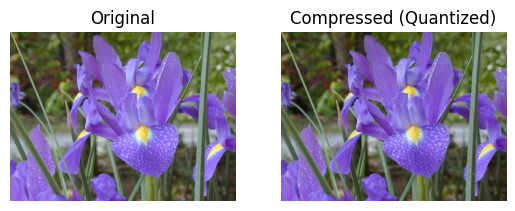

Original size (bits): 46080000
Compressed size (bits): 23040000
Compression ratio: 2.0


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image (as RGB)
img = cv2.imread("/content/Fig0651(a)(flower_no_compression).tif")[:, :, ::-1]

# --- Original size in bits ---
h, w, c = img.shape
original_bits = h * w * c * 8  # 8 bits per channel

# --- Manual Compression by Quantization ---
# Reduce from 256 levels -> 16 levels per channel (4 bits)
compressed_img = (img // 16) * 16  # Quantization
compressed_bits = h * w * c * 4  # 4 bits per channel

# --- Display ---
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(compressed_img)
plt.title("Compressed (Quantized)")
plt.axis("off")

plt.show()

# Print bit sizes
print("Original size (bits):", original_bits)
print("Compressed size (bits):", compressed_bits)
print("Compression ratio:", original_bits / compressed_bits)
